In [4]:
import pandas as pd

file_path = 'ds_salaries.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [5]:
# Check for null values in each column
null_values = df.isnull().sum()

# Display the count of null values for each column
print(null_values)

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [6]:
# Check for duplicate rows
duplicates = df.duplicated()

# Display boolean Series indicating duplicates
print("Duplicate rows:")
print(duplicates)

# Count total number of duplicate rows
num_duplicates = duplicates.sum()
print("\nTotal number of duplicate rows:", num_duplicates)

Duplicate rows:
0       False
1       False
2       False
3       False
4       False
        ...  
3750    False
3751    False
3752    False
3753    False
3754    False
Length: 3755, dtype: bool

Total number of duplicate rows: 1171


In [7]:
# checking unique values in all the columns 
# Loop through each column and count the number of distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")


work_year: 4 distinct values
experience_level: 4 distinct values
employment_type: 4 distinct values
job_title: 93 distinct values
salary: 815 distinct values
salary_currency: 20 distinct values
salary_in_usd: 1035 distinct values
employee_residence: 78 distinct values
remote_ratio: 3 distinct values
company_location: 72 distinct values
company_size: 3 distinct values


In [8]:
#Rename the value for better understanding
df['experience_level'] = df['experience_level'].replace({
    'SE': 'Senior',
    'EN': 'Entry level',
    'EX': 'Executive level',
    'MI': 'Mid/Intermediate level',
})

df['employment_type'] = df['employment_type'].replace({
    'FL': 'Freelancer',
    'CT': 'Contractor',
    'FT' : 'Full-time',
    'PT' : 'Part-time'
})
df['company_size'] = df['company_size'].replace({
    'S': 'SMALL',
    'M': 'MEDIUM',
    'L' : 'LARGE',
})
df['remote_ratio'] = df['remote_ratio'].astype(str)
df['remote_ratio'] = df['remote_ratio'].replace({
    '0': 'On-Site',
    '50': 'Half-Remote',
    '100' : 'Full-Remote',
})


In [9]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,ES,Full-Remote,ES,LARGE
1,2023,Mid/Intermediate level,Contractor,ML Engineer,30000,USD,30000,US,Full-Remote,US,SMALL
2,2023,Mid/Intermediate level,Contractor,ML Engineer,25500,USD,25500,US,Full-Remote,US,SMALL
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,CA,Full-Remote,CA,MEDIUM
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,CA,Full-Remote,CA,MEDIUM


In [10]:
unique_categories = df['job_title'].unique()
print("Unique categories:", unique_categories)

Unique categories: ['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Autonomous Vehicle Technician' 'Applied Machine Learning Scientist'
 'Lead Data Scientist' 'Cloud Database Engineer' 'Financial Data Analyst'
 'Data Infrastructure Engineer' 'S

In [11]:
def assign_broader_category(job_title):
    data_engineering = ["Data Engineer", "Data Analyst", "Analytics Engineer", "BI Data Analyst", "Business Data Analyst", "BI Developer", "BI Analyst", "Business Intelligence Engineer", "BI Data Engineer", "Power BI Developer"]
    data_scientist = ["Data Scientist", "Applied Scientist", "Research Scientist", "3D Computer Vision Researcher", "Deep Learning Researcher", "AI/Computer Vision Engineer"]
    machine_learning = ["Machine Learning Engineer", "ML Engineer", "Lead Machine Learning Engineer", "Principal Machine Learning Engineer"]
    data_architecture = ["Data Architect", "Big Data Architect", "Cloud Data Architect", "Principal Data Architect"]
    management = ["Data Science Manager", "Director of Data Science", "Head of Data Science", "Data Scientist Lead", "Head of Machine Learning", "Manager Data Management", "Data Analytics Manager"]
    
    if job_title in data_engineering:
        return "Data Engineering"
    elif job_title in data_scientist:
        return "Data Science"
    elif job_title in machine_learning:
        return "Machine Learning"
    elif job_title in data_architecture:
        return "Data Architecture"
    elif job_title in management:
        return "Management"
    else:
        return "Other"

# Apply the function to the 'job_title' column and create a new column 'job_category'
df['job_category'] = df['job_title'].apply(assign_broader_category)

In [12]:
df.head(15)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,ES,Full-Remote,ES,LARGE,Other
1,2023,Mid/Intermediate level,Contractor,ML Engineer,30000,USD,30000,US,Full-Remote,US,SMALL,Machine Learning
2,2023,Mid/Intermediate level,Contractor,ML Engineer,25500,USD,25500,US,Full-Remote,US,SMALL,Machine Learning
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,CA,Full-Remote,CA,MEDIUM,Data Science
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,CA,Full-Remote,CA,MEDIUM,Data Science
5,2023,Senior,Full-time,Applied Scientist,222200,USD,222200,US,On-Site,US,LARGE,Data Science
6,2023,Senior,Full-time,Applied Scientist,136000,USD,136000,US,On-Site,US,LARGE,Data Science
7,2023,Senior,Full-time,Data Scientist,219000,USD,219000,CA,On-Site,CA,MEDIUM,Data Science
8,2023,Senior,Full-time,Data Scientist,141000,USD,141000,CA,On-Site,CA,MEDIUM,Data Science
9,2023,Senior,Full-time,Data Scientist,147100,USD,147100,US,On-Site,US,MEDIUM,Data Science


In [13]:
unique_categories = df['work_year'].unique()
print("Unique categories:", unique_categories)

Unique categories: [2023 2022 2020 2021]


In [14]:
# Inflation rates
us_inflation_rates = {2020: 0.0181, 2021: 0.0123, 2022: 0.0470, 2023: 0.065}
global_inflation_rates = {2020: 0.0219, 2021: 0.0192, 2022: 0.0350, 2023: 0.088}

# Function to adjust salary
def adjust_salary(row):
    year = row['work_year']
    original_salary = row['salary_in_usd']
    currency = row['salary_currency']

    if year == 2023:
        return original_salary

    adjusted_salary = original_salary
    for y in range(year, 2024):
        if currency == 'USD':
            inflation_rate = us_inflation_rates[y]
        else:
            inflation_rate = global_inflation_rates[y]

        adjusted_salary *= (1 + inflation_rate)

    return adjusted_salary

# Apply the function to the dataset
df['adjusted_salary'] = df.apply(adjust_salary, axis=1)

In [15]:
df.head(20)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category,adjusted_salary
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,ES,Full-Remote,ES,LARGE,Other,85847.0
1,2023,Mid/Intermediate level,Contractor,ML Engineer,30000,USD,30000,US,Full-Remote,US,SMALL,Machine Learning,30000.0
2,2023,Mid/Intermediate level,Contractor,ML Engineer,25500,USD,25500,US,Full-Remote,US,SMALL,Machine Learning,25500.0
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,CA,Full-Remote,CA,MEDIUM,Data Science,175000.0
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,CA,Full-Remote,CA,MEDIUM,Data Science,120000.0
5,2023,Senior,Full-time,Applied Scientist,222200,USD,222200,US,On-Site,US,LARGE,Data Science,222200.0
6,2023,Senior,Full-time,Applied Scientist,136000,USD,136000,US,On-Site,US,LARGE,Data Science,136000.0
7,2023,Senior,Full-time,Data Scientist,219000,USD,219000,CA,On-Site,CA,MEDIUM,Data Science,219000.0
8,2023,Senior,Full-time,Data Scientist,141000,USD,141000,CA,On-Site,CA,MEDIUM,Data Science,141000.0
9,2023,Senior,Full-time,Data Scientist,147100,USD,147100,US,On-Site,US,MEDIUM,Data Science,147100.0


Univariate Analysis

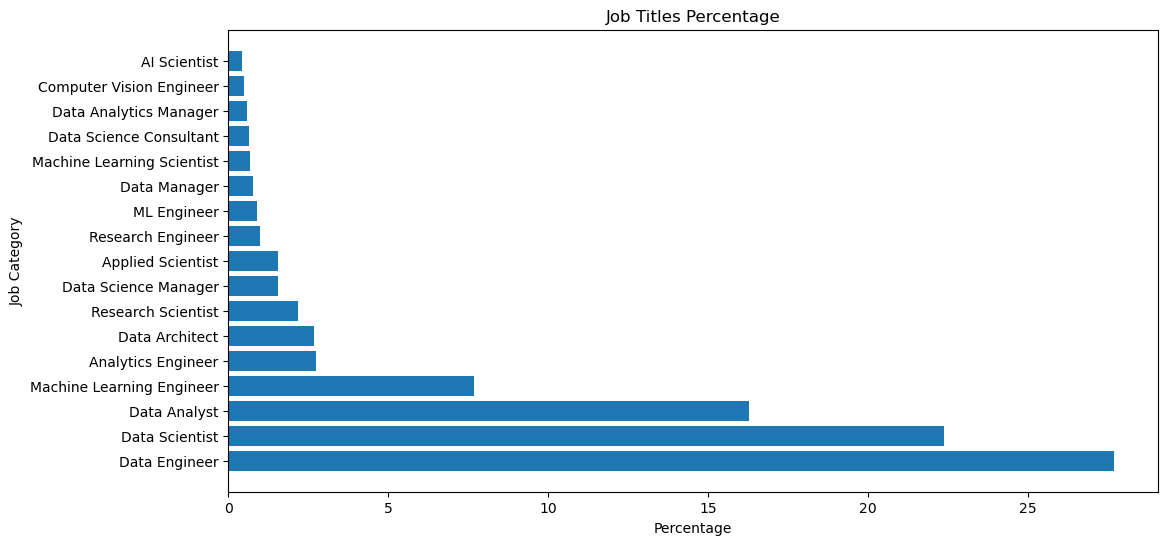

In [16]:
import matplotlib.pyplot as plt
value_counts = df['job_title'].value_counts(normalize=True) * 100

fig, ax = plt.subplots(figsize=(12, 6))
top_n = min(17, len(value_counts))
ax.barh(value_counts.index[:top_n], value_counts.values[:top_n])
ax.set_xlabel('Percentage')
ax.set_ylabel('Job Category')
ax.set_title('Job Titles Percentage')
plt.show()

In [17]:
import pandas as pd
df.to_csv('ds_salaries.csv', index=False)